## Training a convnet from scratch on a small dataset

### The relevance of deep learning for small-data problems

### Processing Downloaded data

1. Imports

In [12]:
import os, shutil, pathlib
from pathlib import Path
import pandas as pd
import numpy as np
import random
from keras.utils import load_img
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from helper_function_Image_verify_tj import image_verify

2. Defining Paths

In [13]:
root_dir = Path('d:\\home\\tjamil\\NED_Pgd\\PGD-DL-B3n4\\07')
os.chdir(root_dir)

data_dir =Path('Data/kagglecatsanddogs_5340/PetImages')
os.listdir(data_dir)

['Cat', 'Dog']

In [14]:
filePaths, image_labels = [], []
categories = ['Cat', 'Dog']

for subclass in categories:
    subclass_path = os.path.join(data_dir, subclass)
    images_list = os.listdir(subclass_path)
    for image in images_list:
        images_path = os.path.join(data_dir, subclass, image)
        ext = image_verify(images_path)
        if ext not in ['jpg', 'gif', 'bmp', 'jpeg', 'png']:
            print(ext)
            continue
        else: #if images_path.endswith('.jpg'):
            image_labels.append(subclass)
            filePaths.append(images_path)
        
df = pd.DataFrame({
    'filepath': filePaths, # image file paths
    'class': image_labels    # image labels
})
df.head()

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


c:\Users\TJAMIL\miniconda3\envs\tf\lib\site-packages\PIL\TiffImagePlugin.py:868: UserWarning: Truncated File Read
  warnings.warn(str(msg))


None


,filepath,class
0,Data\kagglecatsanddogs_5340\PetImages\Cat\0.jpg,Cat
1,Data\kagglecatsanddogs_5340\PetImages\Cat\1.jpg,Cat
2,Data\kagglecatsanddogs_5340\PetImages\Cat\10.jpg,Cat
3,Data\kagglecatsanddogs_5340\PetImages\Cat\100.jpg,Cat
4,Data\kagglecatsanddogs_5340\PetImages\Cat\1000...,Cat


<Axes: xlabel='class'>

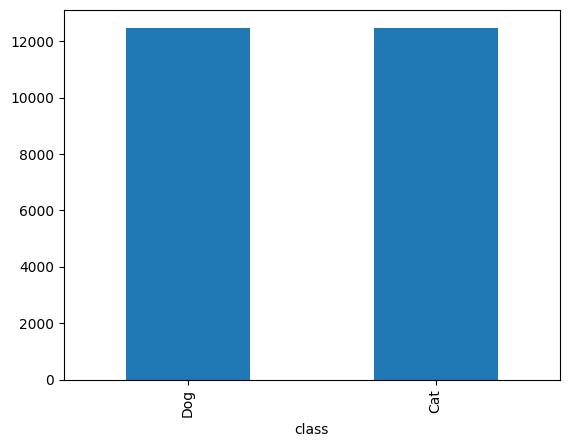

In [15]:
#Data visualization
df['class'].value_counts().plot.bar()  # to check class imbalance

(351, 263) Dog


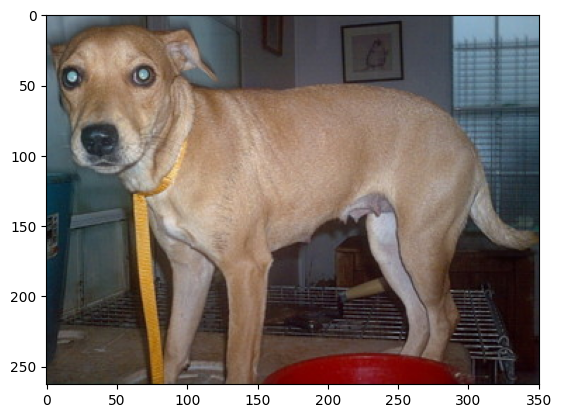

In [16]:
#checking one sample
idx = np.random.randint(0, len(df))
sample = df.at[idx, 'filepath']
image = load_img(sample)
plt.imshow(image)
print(image.size, df.at[idx,'class'])

In [17]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=7)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

In [23]:
batch_size = 32
IMAGE_SIZE = (120,120)   # arbiterarilyy selected
train_datagen = ImageDataGenerator(rescale = 1./255)  # make sure rescaling is only done once
valid_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "./", 
    x_col = 'filepath',   # name of column holding image paths
    y_col = 'class',      # name of column holding image labels
    target_size = IMAGE_SIZE,
    #class_mode = 'categorical',
    labe_mode = 'categorical',
    batch_size = batch_size
)

valid_generator = train_datagen.flow_from_dataframe(
    validate_df, 
    "./", 
    x_col = 'filepath',   # name of column holding image paths
    y_col = 'class',      # name of column holding image labels
    target_size = IMAGE_SIZE,
    #class_mode = 'categorical',
    label_mode = 'categorical',
    batch_size = batch_size
)

Found 19969 validated image filenames belonging to 2 classes.
Found 4993 validated image filenames belonging to 2 classes.


### Building the model

**Instantiating a small convnet for dogs vs. cats classification**

In [24]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(120, 120, 3))
#x = layers.Rescaling(1./255)(inputs)

x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)

#x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
#x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)

outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [25]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 120, 120, 3)]     0         
                                                                 
 conv2d_4 (Conv2D)           (None, 118, 118, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 59, 59, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 57, 57, 64)        18496     
                                                                 
 flatten_2 (Flatten)         (None, 207936)            0         
                                                                 
 dense_2 (Dense)             (None, 1)                 207937    
                                                           

**Configuring the model for training**

In [26]:
model.compile(loss="binary_crossentropy",
              #optimizer="rmsprop",
              optimizer = keras.optimizers.SGD(learning_rate=0.001),
              metrics=["accuracy"])

**Fitting the model using a `Dataset`**

In [27]:
callbacks = [
    keras.callbacks.ModelCheckpoint(        # saving best model 
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=valid_generator,)
    #callbacks=callbacks)

Epoch 1/30
625/625 [==============================] - ETA: 0s - loss: 0.6934 - accuracy: 0.5000

c:\Users\TJAMIL\miniconda3\envs\tf\lib\site-packages\PIL\TiffImagePlugin.py:868: UserWarning: Truncated File Read
  warnings.warn(str(msg))


625/625 [==============================] - 98s 157ms/step - loss: 0.6934 - accuracy: 0.5000 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 2/30
143/625 [=====>........................] - ETA: 1:10 - loss: 0.6933 - accuracy: 0.5000

**Displaying curves of loss and accuracy during training**

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**Evaluating the model on the test set**

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

### Using data augmentation

**Define a data augmentation stage to add to an image model**

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

**Displaying some randomly augmented training images**

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

**Defining a new convnet that includes image augmentation and dropout**

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**Training the regularized convnet**

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks)

**Evaluating the model on the test set**

In [ ]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

## Leveraging a pretrained model

### Feature extraction with a pretrained model

**Instantiating the VGG16 convolutional base**

In [ ]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

In [ ]:
conv_base.summary()

#### Fast feature extraction without data augmentation

**Extracting the VGG16 features and corresponding labels**

In [ ]:
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

In [ ]:
train_features.shape

**Defining and training the densely connected classifier**

In [ ]:
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.keras",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

**Plotting the results**

In [ ]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

#### Feature extraction together with data augmentation

**Instantiating and freezing the VGG16 convolutional base**

In [ ]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

**Printing the list of trainable weights before and after freezing**

In [ ]:
conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))

In [ ]:
conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

**Adding a data augmentation stage and a classifier to the convolutional base**

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

**Evaluating the model on the test set**

In [ ]:
test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

### Fine-tuning a pretrained model

In [ ]:
conv_base.summary()

**Freezing all layers until the fourth from the last**

In [ ]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

**Fine-tuning the model**

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

In [ ]:
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

## Summary